In [1]:
require 'mxnet'
require 'mxnet/gluon'

true

In [2]:
def transform(data, label)
  [data.as_type(:float32) / 255, label]
end
train_data = MXNet::Gluon::Data::DataLoader.new(
  MXNet::Gluon::Data::Vision::MNIST.new(train: true, transform: method(:transform)),
  batch_size: 10, shuffle: true
)
test_data = MXNet::Gluon::Data::DataLoader.new(
  MXNet::Gluon::Data::Vision::MNIST.new(train: false, transform: method(:transform)),
  batch_size: 10, shuffle: false
)

#<MXNet::Gluon::Data::DataLoader:0x00007f926822be90 @dataset=#<MXNet::Gluon::Data::Vision::MNIST:0x00007f9268233dc0 @train=false, @train_data=["train-images-idx3-ubyte.gz", "6c95f4b05d2bf285e1bfb0e7960c31bd3b3f8a7d"], @train_label=["train-labels-idx1-ubyte.gz", "2a80914081dc54586dbdf242f9805a6b8d2a15fc"], @test_data=["t10k-images-idx3-ubyte.gz", "c3a25af1f52dad7f726cce8cacb138654b760d48"], @test_label=["t10k-labels-idx1-ubyte.gz", "763e7fa3757d93b0cdec073cef058b2004252c17"], @namespace="mnist", @transform=#<Method: main.transform>, @data=
[[[[0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
 ...
<MXNet::NDArray 10000x28x28x1 @cpu(0)>, @label=Numo::UInt8#shape=[10000]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, ...], @root="/Users/tsundsted/.mxnet/datasets/mnist">, @pin_memory=false, @thread_pool=false, @batch_sampler=#<MXNet::Glu

In [3]:
require 'rmagick'

true

In [4]:
images, labels = train_data.first

[
[[[[0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
 ...
<MXNet::NDArray 10x28x28x1 @cpu(0)>, 
[4, 6, 2, 6, 3, 1, 8, 1, 4, 1]
<MXNet::NDArray 10 @cpu(0)>]

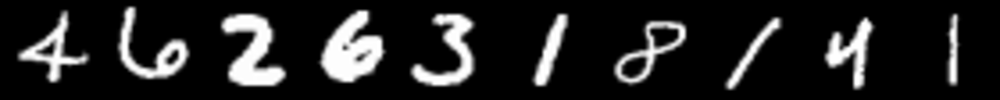

In [7]:
(0..9).inject(Magick::ImageList.new) do |list, i|
  values = images[i].to_narray.flatten
  list << Magick::Image.constitute(28, 28, "I", values).tap do |img|
    img.format = "png"
  end.resize(100, 100)
end.append(false)

In [8]:
labels[0..9]


[4, 6, 2, 6, 3, 1, 8, 1, 4, 1]
<MXNet::NDArray 10 @cpu(0)>

In [9]:
images, labels = test_data.first

[
[[[[0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
   [0], 
 ...
<MXNet::NDArray 10x28x28x1 @cpu(0)>, 
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
<MXNet::NDArray 10 @cpu(0)>]

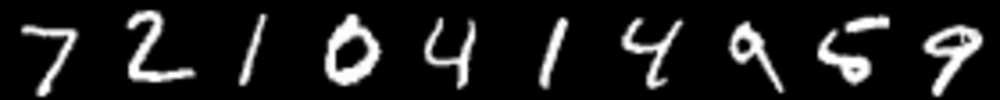

In [10]:
(0..9).inject(Magick::ImageList.new) do |list, i|
  values = images[i].to_narray.flatten
  list << Magick::Image.constitute(28, 28, "I", values).tap do |img|
    img.format = "png"
  end.resize(100, 100)
end.append(false)

In [11]:
labels[0..9]


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
<MXNet::NDArray 10 @cpu(0)>